In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set up paths
SCRIPT_DIR_PATH = os.getcwd()
PROJECT_DIR_PATH = os.path.dirname(SCRIPT_DIR_PATH)
MODEL_DIR_PATH = os.path.join(PROJECT_DIR_PATH, 'model')
OUTPUTS_DIR_PATH = os.path.join(MODEL_DIR_PATH, 'outputs')
BASELINE_DIR_PATH = os.path.join(OUTPUTS_DIR_PATH, 'baseline')
ENSEMBLE_DIR_PATH = os.path.join(OUTPUTS_DIR_PATH, 'ensemble')
EXP_DESIGN_DIR_PATH = os.path.join(OUTPUTS_DIR_PATH, 'exp_design')
CONFIG_DIR_PATH = os.path.join(MODEL_DIR_PATH, 'python_ver/config')
SINGLE_SIM_DIR_PATH = os.path.join(OUTPUTS_DIR_PATH, 'single_sim')

In [4]:
model_version = 6
output_df = pd.read_csv(os.path.join(ENSEMBLE_DIR_PATH, f"ensemble_config_{model_version}_output.csv"))
output_df

,State_Inputs,State_Capacity,Administrative_Complexity,time,run_id
0,1.000000,0.500000,0.050000,0.0,1.0
1,1.003153,0.504651,0.052478,0.2,1.0
2,1.006298,0.509302,0.054974,0.4,1.0
3,1.009432,0.513951,0.057487,0.6,1.0
4,1.012558,0.518599,0.060018,0.8,1.0
...,...,...,...,...,...
150095,0.904672,0.062055,0.780273,299.2,100.0
150096,0.906925,0.064923,0.779135,299.4,100.0
150097,0.909185,0.067861,0.778025,299.6,100.0
150098,0.911451,0.070870,0.776942,299.8,100.0


In [131]:
output_df.min()

Resources      1.219144e-06
Economy        1.070518e-04
Bureaucracy    4.693561e-58
Pollution      1.000000e-03
time           0.000000e+00
run_id         1.000000e+00
dtype: float64

## TODO: Modify all below for new model version

In [132]:
fe = FeatureExtractor(time_periods)
edau = EDAUtils()

# Time Series Clustering (Simple Approach)

## Create freatures df

In [133]:
transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()
transformed_output_df.head() 

/tmp/ipykernel_4108/2261743549.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()


,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,...,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200,Pollution_delta_300,Pollution_delta_400,Pollution_delta_500
0,1.0,0.000115,1.0,0.000076,48.179088,-0.999885,-0.005427,-0.031775,-0.000132,-2.651926e-07,...,0.003122,0.031540,0.007642,0.000122,0.000002,3.706737e-07,3.462754e-07,3.498209e-07,3.541944e-07,3.590733e-07
1,2.0,0.060300,1.0,0.036358,81.992573,-0.939700,-0.002453,-0.010504,-0.030004,-1.484937e-04,...,0.002773,0.013042,0.022083,0.000769,0.000030,1.182031e-05,1.174997e-05,1.332386e-05,1.512903e-05,1.718550e-05
2,3.0,0.024293,1.0,0.016392,70.797343,-0.975707,-0.002246,-0.009987,-0.032972,-7.269284e-05,...,0.001470,0.006713,0.034759,0.002263,0.000071,2.963102e-06,9.077939e-07,9.258606e-07,1.017642e-06,1.119245e-06
3,4.0,0.008210,1.0,0.006351,46.300617,-0.991790,-0.006926,-0.051631,-0.000063,3.191635e-06,...,0.005180,0.038447,0.001978,0.000045,0.000002,6.419088e-07,6.296242e-07,6.644029e-07,7.019232e-07,7.418679e-07
4,5.0,0.021762,1.0,0.021762,67.916853,-0.978238,-0.003732,-0.013456,-0.018752,-9.801631e-05,...,0.003092,0.023825,0.005857,0.000073,0.000030,2.946721e-05,2.916648e-05,2.800400e-05,2.689154e-05,2.582684e-05


In [134]:
transformed_output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   run_id                          200 non-null    float64
 1   Resources_final                 200 non-null    float64
 2   Resources_max                   200 non-null    float64
 3   Resources_min                   200 non-null    float64
 4   Resources_auc                   200 non-null    float64
 5   Resources_final_initial_diff    200 non-null    float64
 6   Resources_delta_25              200 non-null    float64
 7   Resources_delta_50              200 non-null    float64
 8   Resources_delta_75              200 non-null    float64
 9   Resources_delta_100             200 non-null    float64
 10  Resources_delta_125             200 non-null    float64
 11  Resources_delta_150             200 non-null    float64
 12  Resources_delta_175             200 

## Data Cleaning

- Drop duplicates?

In [135]:
transformed_output_df.isnull().sum().sort_values(ascending=False).head()


run_id             0
Resources_final    0
Resources_max      0
Resources_min      0
Resources_auc      0
dtype: int64

In [136]:
# Check for duplicates
transformed_output_df.duplicated().sum()

np.int64(0)

In [137]:
# Drop run_id to create features dataframe
features_df = transformed_output_df.drop(columns=["run_id"])
features_df.head()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,Resources_delta_125,...,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200,Pollution_delta_300,Pollution_delta_400,Pollution_delta_500
0,0.000115,1.0,0.000076,48.179088,-0.999885,-0.005427,-0.031775,-0.000132,-2.651926e-07,7.635944e-08,...,0.003122,0.031540,0.007642,0.000122,0.000002,3.706737e-07,3.462754e-07,3.498209e-07,3.541944e-07,3.590733e-07
1,0.060300,1.0,0.036358,81.992573,-0.939700,-0.002453,-0.010504,-0.030004,-1.484937e-04,4.419197e-05,...,0.002773,0.013042,0.022083,0.000769,0.000030,1.182031e-05,1.174997e-05,1.332386e-05,1.512903e-05,1.718550e-05
2,0.024293,1.0,0.016392,70.797343,-0.975707,-0.002246,-0.009987,-0.032972,-7.269284e-05,1.505329e-05,...,0.001470,0.006713,0.034759,0.002263,0.000071,2.963102e-06,9.077939e-07,9.258606e-07,1.017642e-06,1.119245e-06
3,0.008210,1.0,0.006351,46.300617,-0.991790,-0.006926,-0.051631,-0.000063,3.191635e-06,4.089349e-06,...,0.005180,0.038447,0.001978,0.000045,0.000002,6.419088e-07,6.296242e-07,6.644029e-07,7.019232e-07,7.418679e-07
4,0.021762,1.0,0.021762,67.916853,-0.978238,-0.003732,-0.013456,-0.018752,-9.801631e-05,-1.107137e-05,...,0.003092,0.023825,0.005857,0.000073,0.000030,2.946721e-05,2.916648e-05,2.800400e-05,2.689154e-05,2.582684e-05


## EDA

In [138]:
def get_stock_var_features_subset(df, stock_var_name):
    subset_df = df[[col for col in df.columns if col.startswith(stock_var_name)]].copy()
    return subset_df

In [139]:
resources_feat_df = get_stock_var_features_subset(features_df, 'Resources')
resources_feat_df.describe()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,Resources_delta_125,Resources_delta_150,Resources_delta_175,Resources_delta_200,Resources_delta_300,Resources_delta_400,Resources_delta_500
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.030397,1.000017,0.027868,81.143390,-0.969603,-0.003702,-0.017752,-0.010788,-3.929428e-03,-9.252435e-04,-3.590219e-04,-1.911413e-04,-1.217644e-04,-6.969906e-05,-4.941661e-05,-3.472400e-05
std,0.064860,0.000155,0.063079,50.352020,0.064860,0.001854,0.015281,0.010470,6.390971e-03,2.230957e-03,1.174366e-03,6.158237e-04,3.740066e-04,2.300602e-04,1.739871e-04,1.356731e-04
min,0.000002,1.000000,0.000001,39.860166,-0.999998,-0.009205,-0.063560,-0.036091,-2.966368e-02,-1.130953e-02,-1.035573e-02,-4.769573e-03,-2.015544e-03,-1.051169e-03,-8.380487e-04,-6.731526e-04
25%,0.000693,1.000000,0.000614,51.483805,-0.999307,-0.004988,-0.024659,-0.018689,-5.608277e-03,-2.549593e-04,-1.653097e-05,-9.848572e-06,-7.640001e-06,-7.002923e-06,-5.797077e-06,-4.484654e-06
50%,0.004442,1.000000,0.003511,65.583136,-0.995558,-0.003372,-0.012523,-0.007903,-7.786680e-05,-4.328747e-07,-2.703953e-08,1.362465e-08,2.366646e-08,2.682842e-08,3.041516e-08,3.311424e-08
75%,0.024616,1.000000,0.021899,87.335181,-0.975384,-0.002242,-0.005938,-0.001220,-9.058082e-07,1.152243e-06,1.888869e-06,2.063144e-06,2.143949e-06,2.241238e-06,2.398330e-06,2.554872e-06
max,0.399414,1.001626,0.399414,316.454769,-0.600586,-0.000642,-0.001412,0.000001,3.430538e-05,1.190074e-04,1.481776e-04,1.527189e-04,1.570338e-04,1.755272e-04,1.962024e-04,2.193174e-04


In [140]:
economy_feat_df = get_stock_var_features_subset(features_df, 'Economy')
economy_feat_df.describe()

,Economy_final,Economy_max,Economy_min,Economy_auc,Economy_final_initial_diff,Economy_delta_25,Economy_delta_50,Economy_delta_75,Economy_delta_100,Economy_delta_125,Economy_delta_150,Economy_delta_175,Economy_delta_200,Economy_delta_300,Economy_delta_400,Economy_delta_500
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.171462,0.578267,0.074754,93.910539,0.071462,0.002903,0.010810,-0.006047,-0.002566,-0.001197,-1.834761e-04,-3.915677e-05,-1.352211e-05,-1.190192e-06,-1.187177e-06,-1.209236e-06
std,0.154939,0.135884,0.035105,64.830045,0.154939,0.001413,0.009863,0.017521,0.007550,0.003468,1.038845e-03,2.942990e-04,1.454441e-04,1.196557e-06,1.010393e-06,1.042110e-06
min,0.000107,0.247714,0.000107,15.016210,-0.099893,0.000870,-0.057550,-0.045804,-0.031301,-0.017232,-9.405085e-03,-2.325503e-03,-1.737575e-03,-9.046041e-06,-4.994568e-06,-5.072339e-06
25%,0.049141,0.486752,0.049141,42.020532,-0.050859,0.001715,0.003822,-0.020411,-0.004463,-0.000742,-2.538482e-05,-2.521791e-06,-1.713563e-06,-1.701208e-06,-1.744189e-06,-1.743611e-06
50%,0.118370,0.596986,0.100000,75.919759,0.018370,0.002681,0.008189,-0.001395,-0.000414,-0.000015,-1.258015e-06,-9.077048e-07,-7.989664e-07,-8.673200e-07,-8.860761e-07,-8.855334e-07
75%,0.272152,0.684485,0.100000,137.464175,0.172152,0.003982,0.017282,0.007432,-0.000009,-0.000001,-4.538870e-07,-3.259649e-07,-2.812977e-07,-3.663187e-07,-3.851100e-07,-3.852647e-07
max,0.678747,0.825925,0.100000,297.175586,0.578747,0.006511,0.035626,0.023183,0.013249,0.005939,3.334248e-03,1.253057e-03,5.816674e-04,1.613286e-06,-1.091600e-09,-1.090489e-09


In [141]:
bureaucracy_feat_df = get_stock_var_features_subset(features_df, 'Bureaucracy')
bureaucracy_feat_df.describe()

,Bureaucracy_final,Bureaucracy_max,Bureaucracy_min,Bureaucracy_auc,Bureaucracy_final_initial_diff,Bureaucracy_delta_25,Bureaucracy_delta_50,Bureaucracy_delta_75,Bureaucracy_delta_100,Bureaucracy_delta_125,Bureaucracy_delta_150,Bureaucracy_delta_175,Bureaucracy_delta_200,Bureaucracy_delta_300,Bureaucracy_delta_400,Bureaucracy_delta_500
count,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.011373e-11,0.406622,1.011373e-11,12.499991,-1.000000e-02,0.000520,0.004995,-0.000291,-0.004476,-0.002258,-5.062660e-04,-9.628719e-05,-2.858824e-05,-9.931400e-08,-2.090920e-10,-5.805251e-13
std,1.163289e-10,0.223835,1.163289e-10,5.762648,1.163289e-10,0.000285,0.009065,0.019851,0.010138,0.004398,1.301884e-03,3.394463e-04,1.555162e-04,6.032780e-07,1.533993e-09,6.397580e-12
min,4.693561e-58,0.013863,4.693561e-58,1.428963,-1.000000e-02,0.000084,-0.000003,-0.051175,-0.033365,-0.022059,-9.720623e-03,-3.539312e-03,-1.947144e-03,-5.153958e-06,-1.626835e-08,-8.778969e-11
25%,1.608050e-36,0.241363,1.608050e-36,9.066000,-1.000000e-02,0.000280,0.000587,-0.006275,-0.009995,-0.002646,-2.600850e-04,-2.631072e-05,-1.357584e-06,-6.980688e-12,-1.704469e-17,-5.327861e-23
50%,6.905660e-28,0.423432,6.905660e-28,11.652797,-1.000000e-02,0.000484,0.002020,0.001559,-0.001200,-0.000233,-2.582022e-05,-7.786146e-07,-2.299594e-08,-3.970997e-15,-7.519825e-22,-1.168882e-28
75%,3.445157e-22,0.576586,3.445157e-22,15.935726,-1.000000e-02,0.000713,0.004659,0.010501,0.000217,-0.000018,-2.264785e-07,-1.899631e-09,-1.578267e-11,-4.435993e-20,-1.559357e-28,-3.633792e-37
max,1.612369e-09,0.977299,1.612369e-09,30.467532,-9.999998e-03,0.001499,0.085563,0.046157,0.021306,0.007014,1.229945e-03,-1.840641e-15,-9.027188e-19,-5.194893e-32,-2.963167e-45,-1.674451e-58


In [142]:
pollution_feat_df = get_stock_var_features_subset(features_df, 'Pollution')
pollution_feat_df.describe()

,Pollution_final,Pollution_max,Pollution_min,Pollution_auc,Pollution_final_initial_diff,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200,Pollution_delta_300,Pollution_delta_400,Pollution_delta_500
count,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.007095,1.007095,1.000000e-03,408.449996,1.006095,0.001419,0.002831,0.017501,0.011125,4.470068e-03,1.120389e-03,3.898258e-04,2.224626e-04,1.190578e-04,9.162016e-05,7.199849e-05
std,0.139105,0.139105,2.173846e-19,77.477178,0.139105,0.000437,0.001320,0.016720,0.010845,6.826357e-03,2.289216e-03,1.009024e-03,6.117424e-04,3.352212e-04,2.580983e-04,2.032181e-04
min,0.500277,0.500277,1.000000e-03,190.290581,0.499277,0.000669,0.001037,0.001618,0.000019,9.821528e-07,1.778179e-07,8.099968e-08,1.865904e-08,2.916037e-09,3.217844e-09,3.570034e-09
25%,0.929937,0.929937,1.000000e-03,366.042000,0.928937,0.001054,0.001915,0.003548,0.002822,4.457785e-05,4.672158e-06,2.546444e-06,1.777403e-06,1.378365e-06,1.387210e-06,1.464300e-06
50%,1.054133,1.054133,1.000000e-03,435.867665,1.053133,0.001383,0.002495,0.008738,0.006590,1.140755e-03,5.636478e-05,1.151811e-05,5.275884e-06,4.101502e-06,3.972978e-06,4.049643e-06
75%,1.111755,1.111755,1.000000e-03,465.749487,1.110755,0.001752,0.003477,0.029894,0.017431,5.516749e-03,1.173634e-03,1.523904e-04,6.055764e-05,2.799059e-05,2.661337e-05,2.492406e-05
max,1.199411,1.199411,1.000000e-03,503.189128,1.198411,0.002345,0.009009,0.059515,0.050295,3.335266e-02,1.504777e-02,8.403476e-03,4.935828e-03,1.830960e-03,1.559891e-03,1.329101e-03


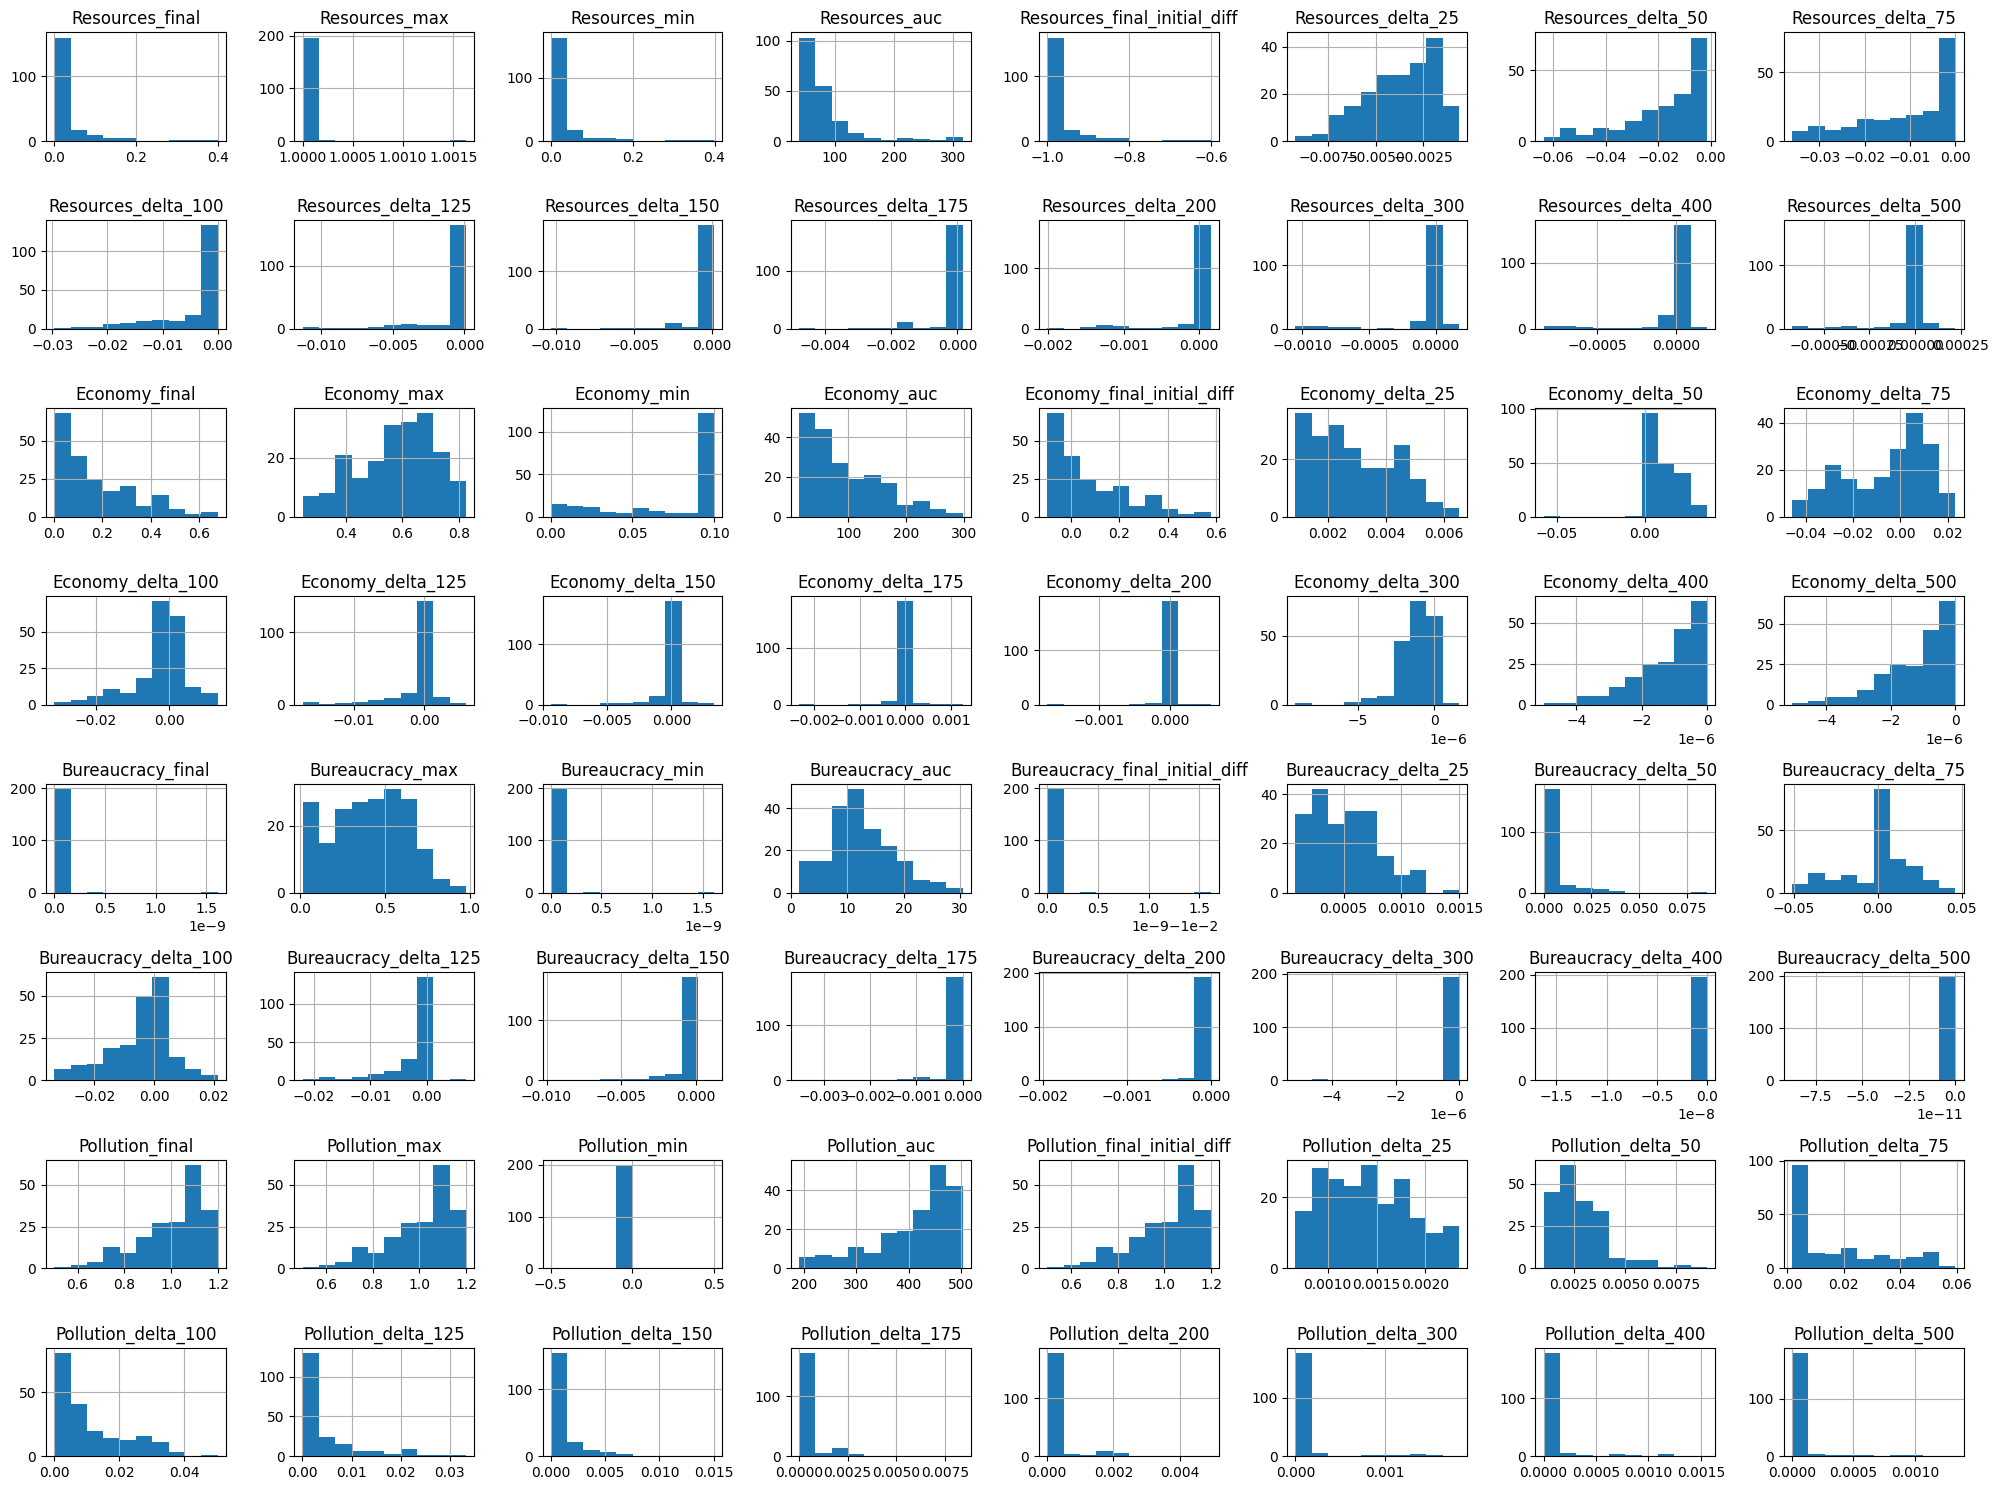

In [143]:
edau.plot_histograms(features_df)

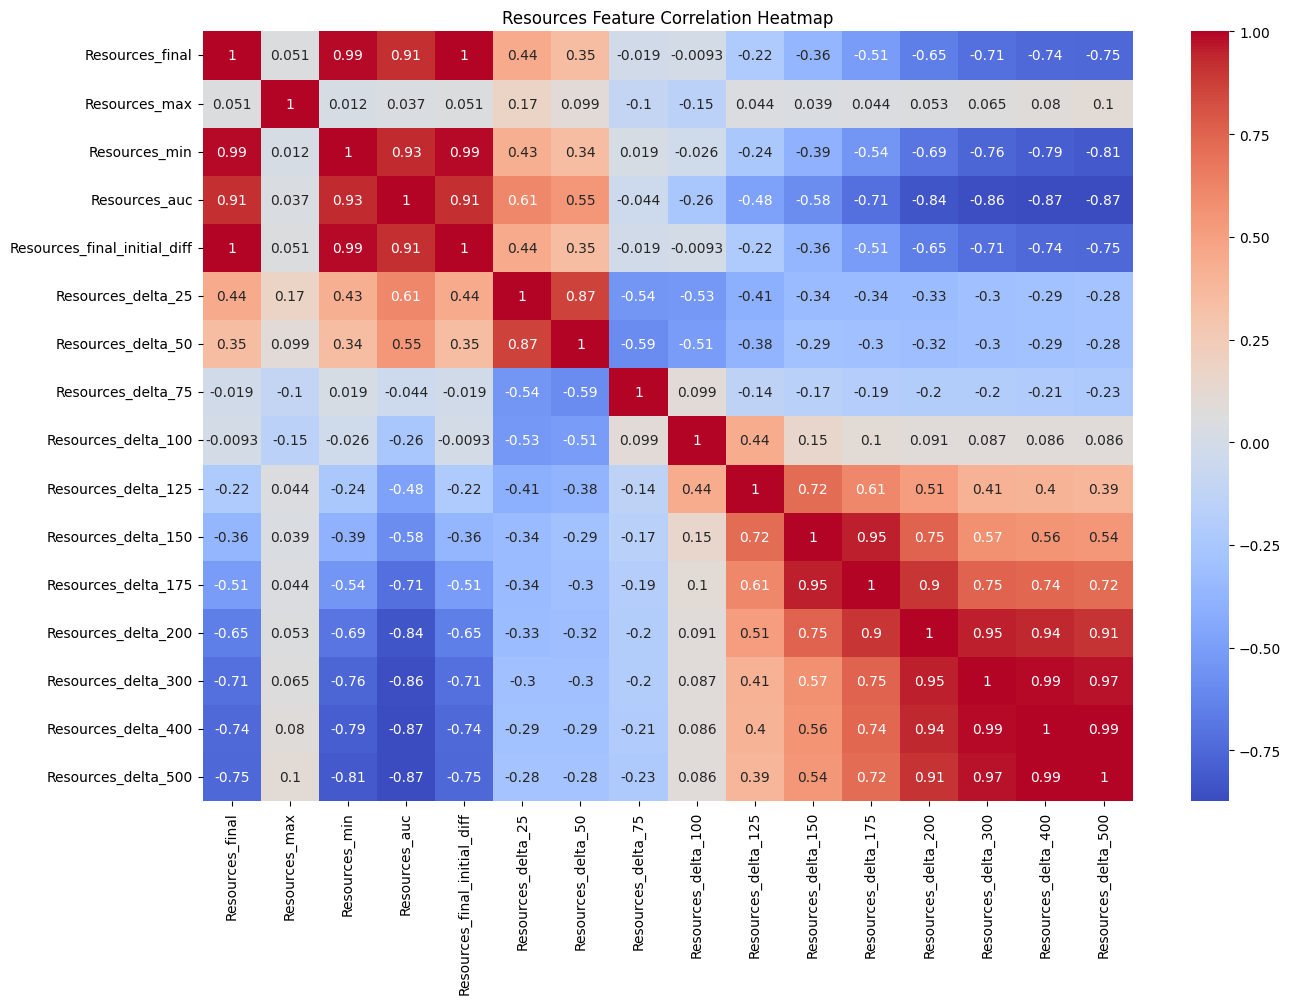

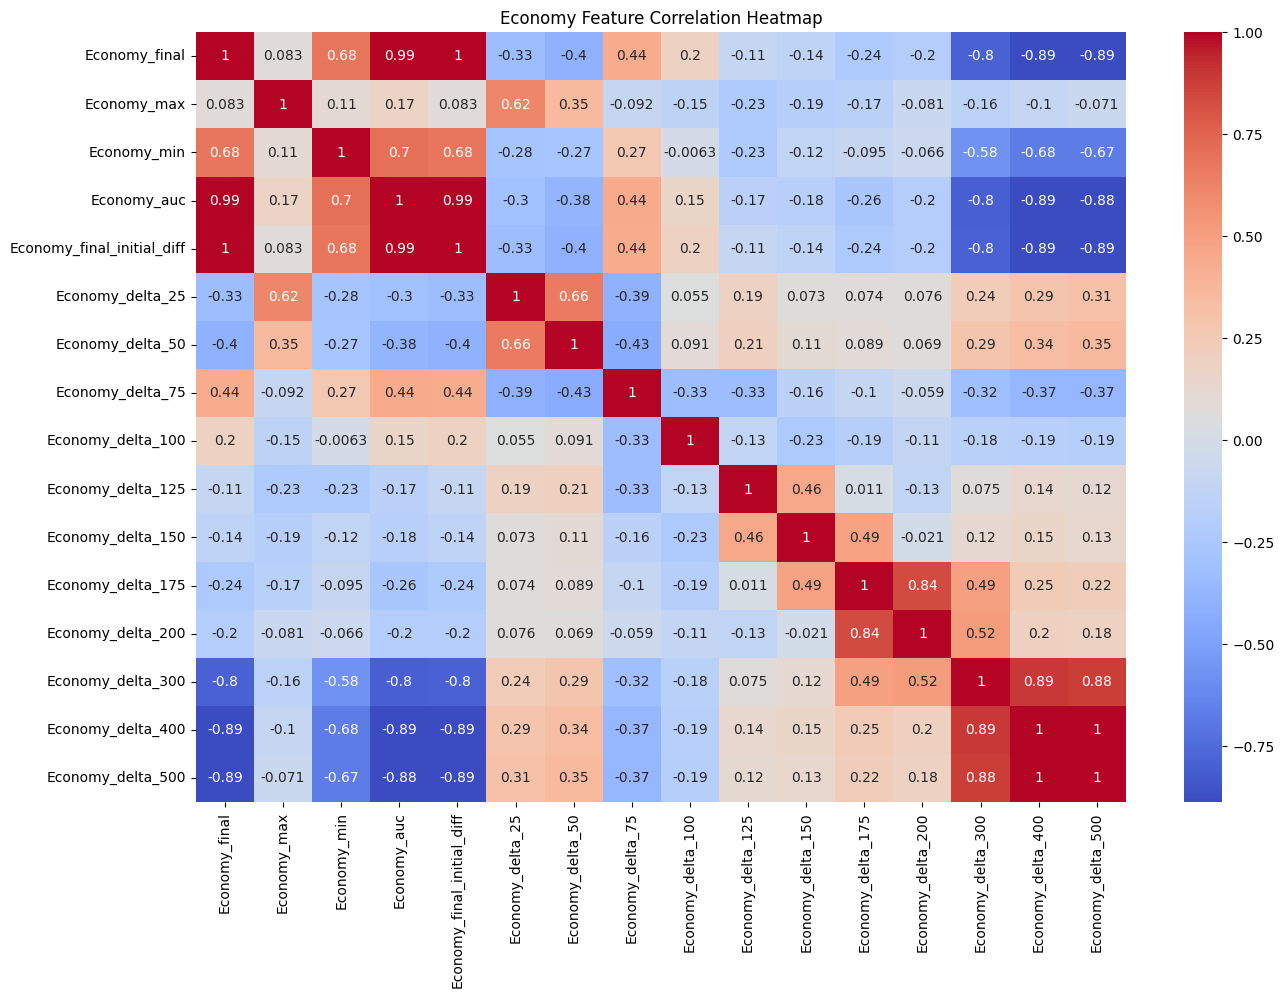

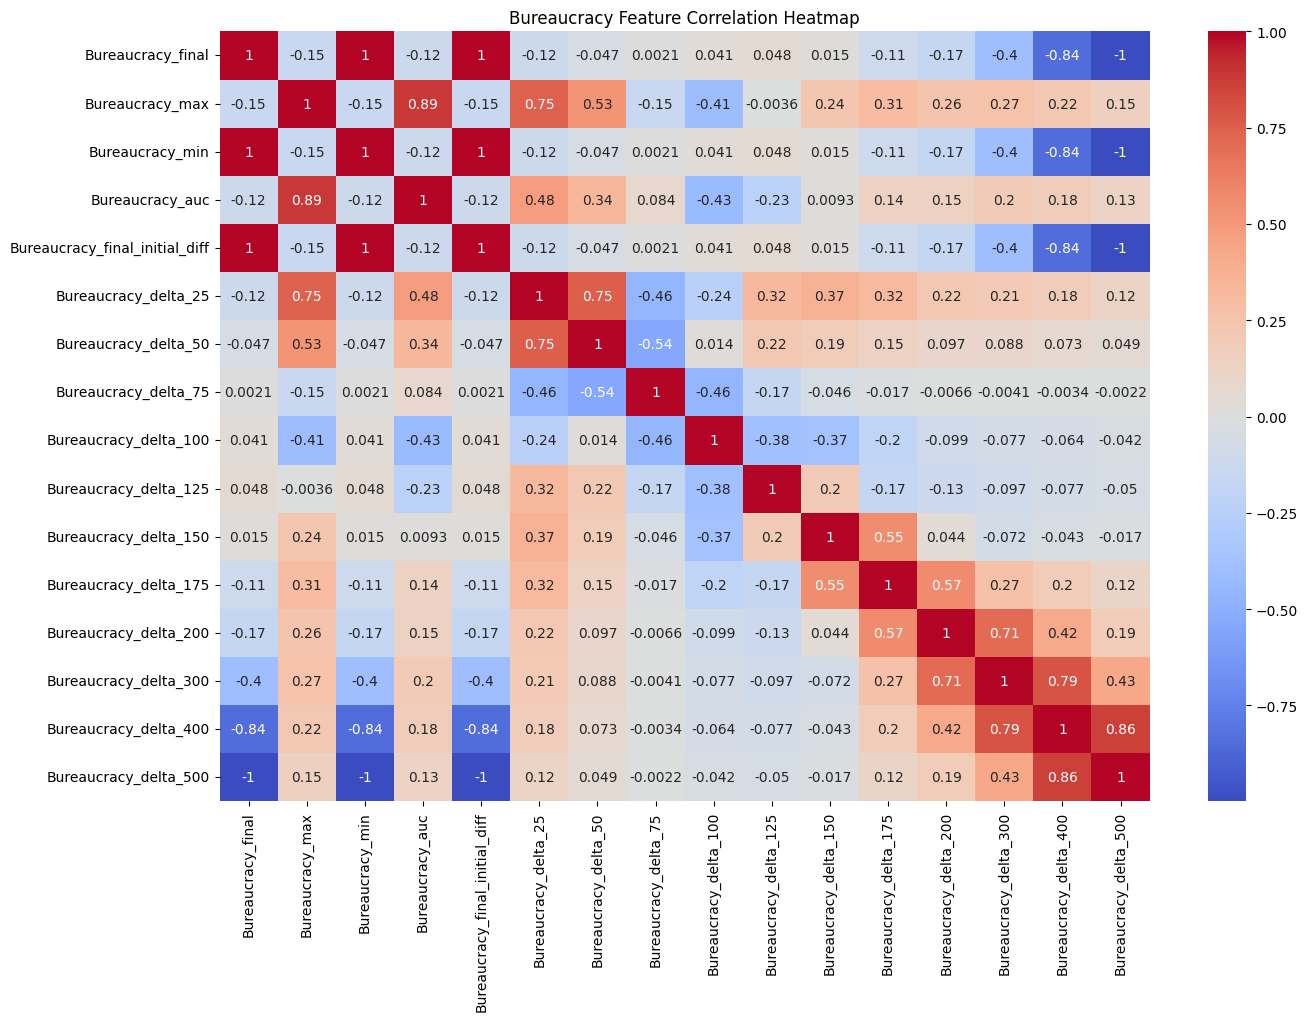

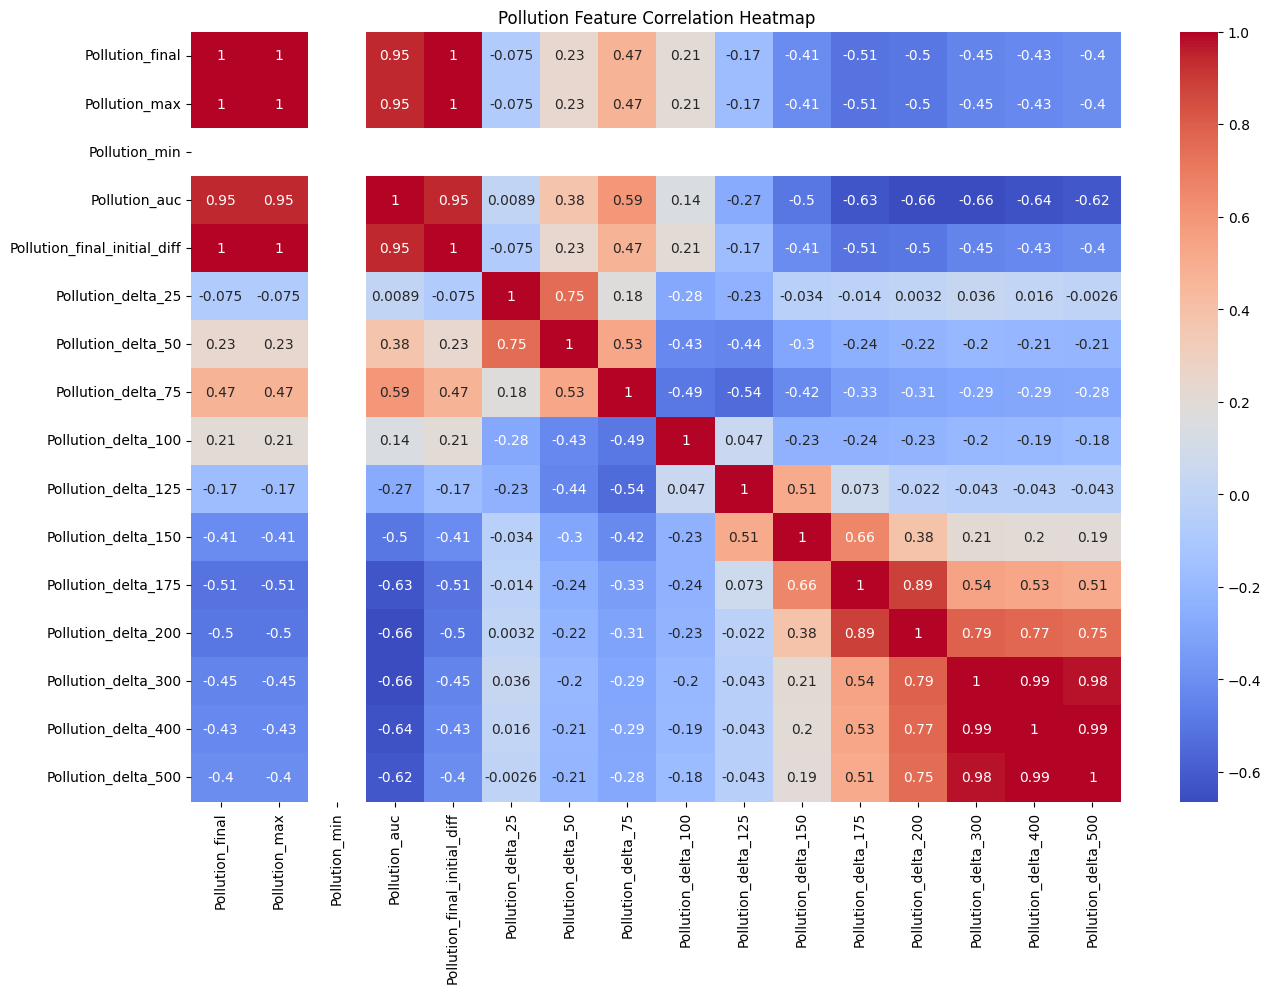

In [144]:
# Correlation heatmap to inspect relationships between features in each stock variable
def plot_corr_heatmap(df, stock_var_name):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title(f"{stock_var_name} Feature Correlation Heatmap")
    plt.show()

plot_corr_heatmap(resources_feat_df, "Resources")
plot_corr_heatmap(economy_feat_df, "Economy")
plot_corr_heatmap(bureaucracy_feat_df, "Bureaucracy")
plot_corr_heatmap(pollution_feat_df, "Pollution")

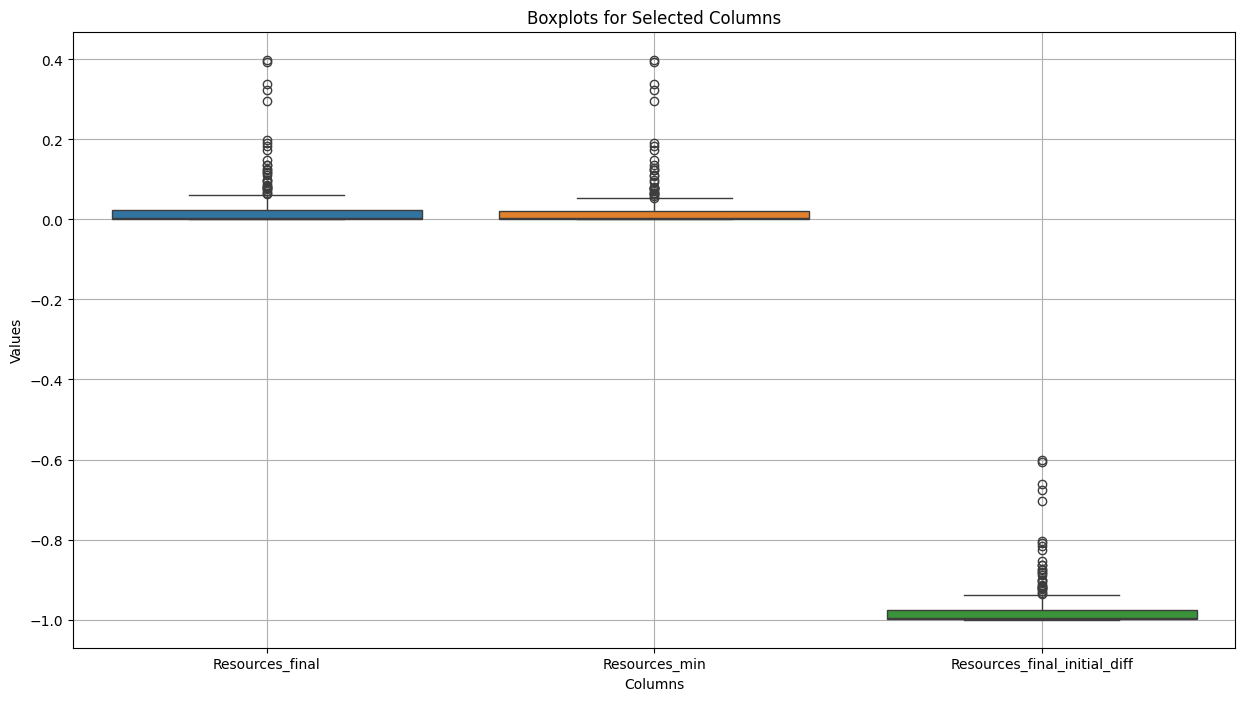

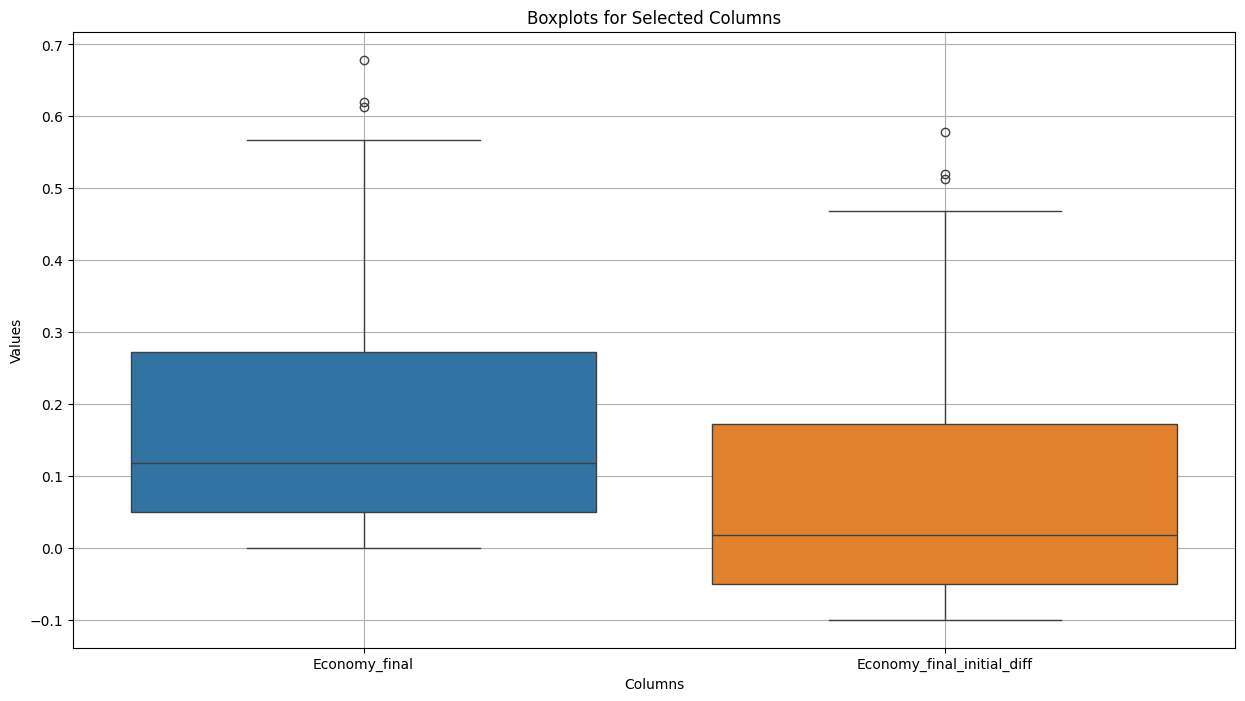

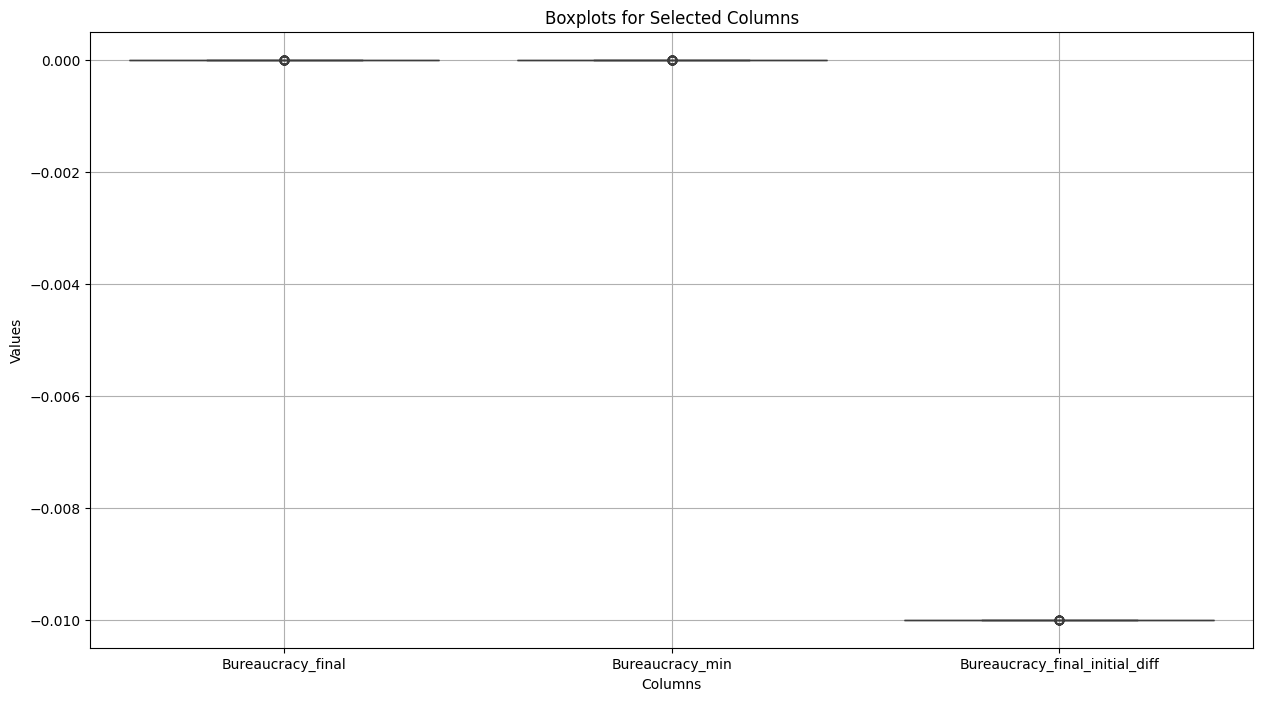

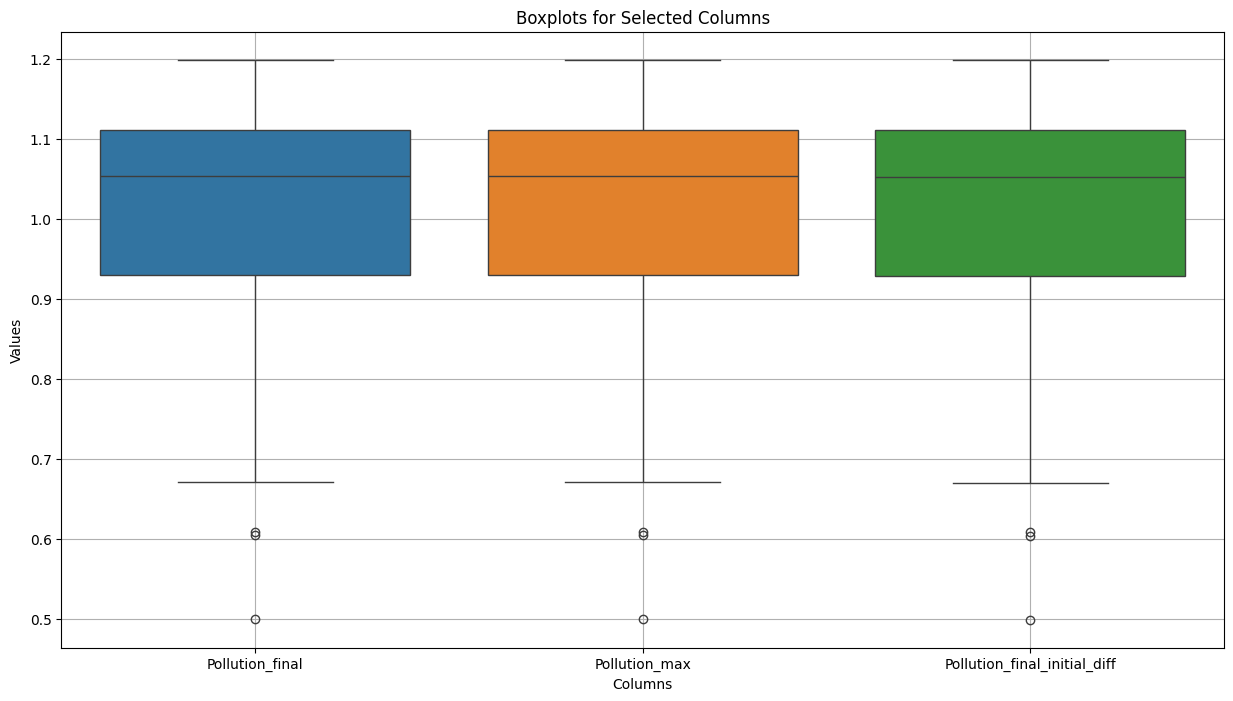

In [145]:
def plot_boxplots(df, columns):
    """
    Plots a single figure with boxplots for the specified columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - columns: list of column names to create boxplots for.
    """
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[columns])
    plt.title("Boxplots for Selected Columns")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()


plot_boxplots(resources_feat_df, ['Resources_final', 'Resources_min', 'Resources_final_initial_diff'])
plot_boxplots(economy_feat_df, ['Economy_final', 'Economy_final_initial_diff'])
plot_boxplots(bureaucracy_feat_df, ['Bureaucracy_final', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff'])
plot_boxplots(pollution_feat_df, ['Pollution_final', 'Pollution_max', 'Pollution_final_initial_diff'])

## Data Preprocessing

In [146]:
# We drop redoundant variables and variable with very tight distributions
features_df = features_df.drop(columns=['Resources_max', 
                                        'Pollution_min', 
                                        'Resources_min', 
                                        'Resources_final_initial_diff', 
                                        'Pollution_max', 
                                        'Pollution_final_initial_diff', 
                                        'Bureaucracy_min', 
                                        'Bureaucracy_final_initial_diff', 
                                        'Economy_final_initial_diff'])


In [147]:
# # Calculate skewness for numeric features in the DataFrame
# skewness = features_df.skew(numeric_only=True)
# # print("Skewness of features:\n", skewness)

# # Define a threshold for high skewness, e.g., absolute skewness > 1
# threshold = 1
# skewed_features = skewness[abs(skewness) > threshold].index.tolist()
# print("Skewed features:", skewed_features)

In [148]:
# features_df_no_skew = features_df.drop(columns=skewed_features)

In [149]:
# # Histograms for each numeric feature
# edau.plot_histograms(features_df[skewed_features])

In [150]:
# # Log-transform the skewed features
# features_df_log = features_df.copy()

# # TODO: Only to skewed features or to all features?
# features_df_log = edau.apply_log_transform(features_df_log, skewed_features)

In [151]:
# edau.plot_histograms(features_df_log[skewed_features])

In [152]:
# Scale the features
X = features_df.copy()
# X = features_df_log.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(200, 55)

### PCA

Number of components selected: 10


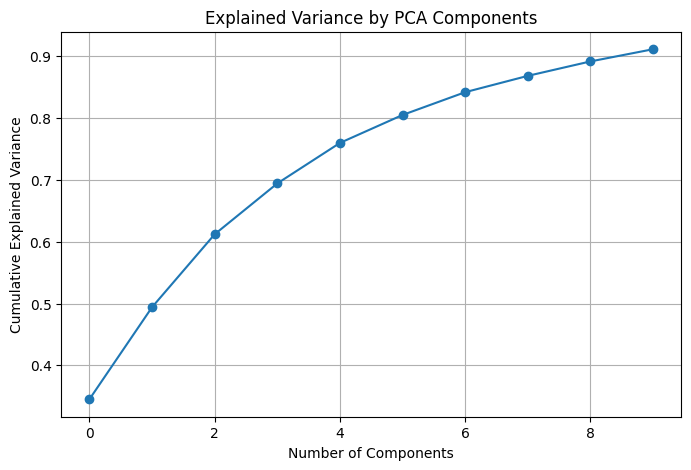

In [153]:
# Retain enough components to explain 90% of the variance
pca = PCA(n_components=0.9, random_state=42)
df_pca = pca.fit_transform(X_scaled)

print("Number of components selected:", pca.n_components_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

Explained variance ratio for all components: [3.45256632e-01 1.48926445e-01 1.17935391e-01 8.22410132e-02
 6.55012419e-02 4.52103995e-02 3.68527135e-02 2.64074012e-02
 2.33520110e-02 1.97207724e-02 1.67780750e-02 1.27631533e-02
 1.07492795e-02 8.76147078e-03 7.49514318e-03 5.94252689e-03
 5.49219369e-03 4.94733164e-03 3.79243433e-03 2.61462377e-03
 1.67347325e-03 1.58003526e-03 1.28853993e-03 9.37253240e-04
 7.72414131e-04 6.41581538e-04 5.40694663e-04 4.12913059e-04
 3.70435100e-04 2.84501742e-04 2.45882959e-04 2.04873350e-04
 1.21084493e-04 7.04635291e-05 4.23478371e-05 4.07433382e-05
 1.06360711e-05 7.76176119e-06 4.80535247e-06 3.46569267e-06
 2.41475989e-06 1.76679796e-06 8.92501249e-07 6.42933860e-07
 4.07547943e-08 3.75866142e-08 2.07029316e-08 1.69690200e-08
 3.95069458e-09 2.50157708e-09 8.02978862e-10 1.10431426e-10
 1.88008203e-11 1.42805988e-11 6.90150093e-13]


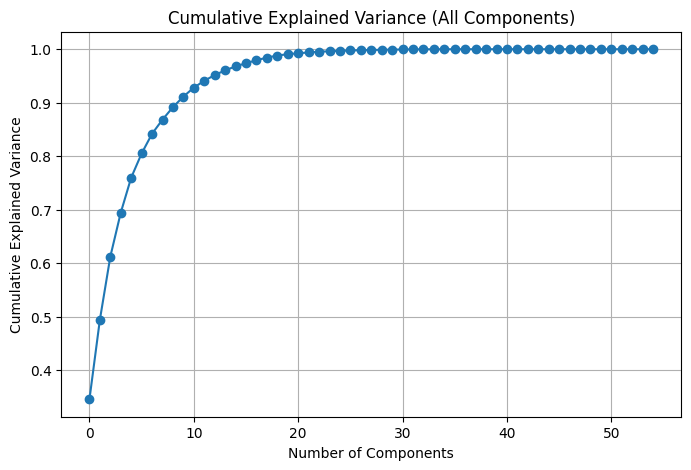

In [154]:
pca_full = PCA(n_components=None, random_state=42)
df_pca_full = pca_full.fit_transform(X_scaled)
print("Explained variance ratio for all components:", pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance (All Components)")
plt.grid(True)
plt.show()


In [155]:
# # Each row = feature, each column = principal component
# loadings = pd.DataFrame(
#     pca_full.components_.T,  # Transpose to have features as rows
#     index=features_df_log.columns,  # Feature names
#     columns=[f'PC{i+1}' for i in range(pca_full.n_components_)]
# )

# # Select top N components to visualize
# top_n = 5
# plt.figure(figsize=(12, min(0.5 * len(loadings), 12)))
# sns.heatmap(loadings.iloc[:, :top_n], annot=True, cmap='coolwarm', center=0)
# plt.title(f"PCA Loadings (Top {top_n} Components)")
# plt.xlabel("Principal Components")
# plt.ylabel("Original Features")
# plt.tight_layout()
# plt.show()

# # Create a dataframe that shows the relationship between the components and the original variables
# df_pca_comp = pd.DataFrame(data = pca.components_,
#                            columns = features_df_log.columns)

# # Create the Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
# plt.figure(figsize=(70,10))
# sns.heatmap(df_pca_comp,
#             vmin = -1, 
#             vmax = 1,
#             cmap = 'RdBu',
#             annot = True)

# plt.title('Components vs Original Features',fontsize = 14)
# plt.show()

In [156]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34525663, 0.49418308, 0.61211847, 0.69435948, 0.75986072,
       0.80507112, 0.84192384, 0.86833124, 0.89168325, 0.91140402])

In [157]:
df_pca.shape

(200, 10)

In [158]:
rows_n = df_pca.shape[0]

## Train Models

### Visualization Functions

### K means

In [159]:
def plot_clusters(df, clusters, principal_component_x=0, principal_component_y=1, principal_component_z=None):
    """
    Plots clusters using 2D or 3D PCA-transformed data.

    Parameters:
    - df: ndarray or DataFrame with PCA components
    - clusters: cluster labels
    - principal_component_x, principal_component_y: indexes of PCA components for 2D plot
    - principal_component_z: index of third component for 3D plot (optional)
    """
    
    if principal_component_z is not None and df.shape[1] > principal_component_z:
        # 3D Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            df[:, principal_component_x], 
            df[:, principal_component_y], 
            df[:, principal_component_z], 
            c=clusters, cmap="plasma", edgecolor='k'
        )
        ax.set_xlabel(f"Principal Component {principal_component_x + 1}")
        ax.set_ylabel(f"Principal Component {principal_component_y + 1}")
        ax.set_zlabel(f"Principal Component {principal_component_z + 1}")
        ax.set_title("Cluster Visualization (PCA 3D)")

        # Create legend
        unique_clusters = np.unique(clusters)
        handles = [
            mpatches.Patch(color=scatter.cmap(scatter.norm(cl)), label=f"Cluster {cl}")
            for cl in unique_clusters
        ]
        ax.legend(handles=handles, title="Cluster Label", loc="upper left")
        plt.show()

    elif df.shape[1] >= 2:
        # 2D Plot
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(
            df[:, principal_component_x], 
            df[:, principal_component_y], 
            c=clusters, cmap="plasma", edgecolor='k'
        )
        plt.xlabel(f"Principal Component {principal_component_x + 1}")
        plt.ylabel(f"Principal Component {principal_component_y + 1}")
        plt.title("Cluster Visualization (PCA 2D)")
        plt.grid(True)

        unique_clusters = np.unique(clusters)
        handles = [
            mpatches.Patch(color=scatter.cmap(scatter.norm(cl)), label=f"Cluster {cl}")
            for cl in unique_clusters
        ]
        plt.legend(handles=handles, title="Cluster Label", loc="best")
        plt.show()
    
    else:
        print("Not enough components to visualize clusters.")
        
    return None


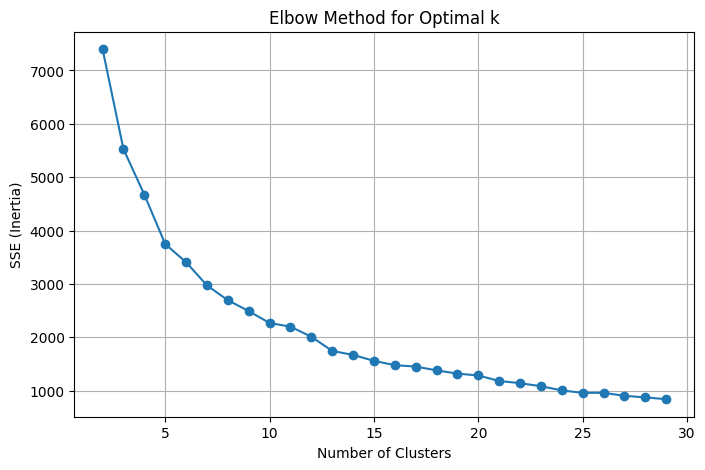

In [160]:
sse = []
k_range = range(2, 30)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


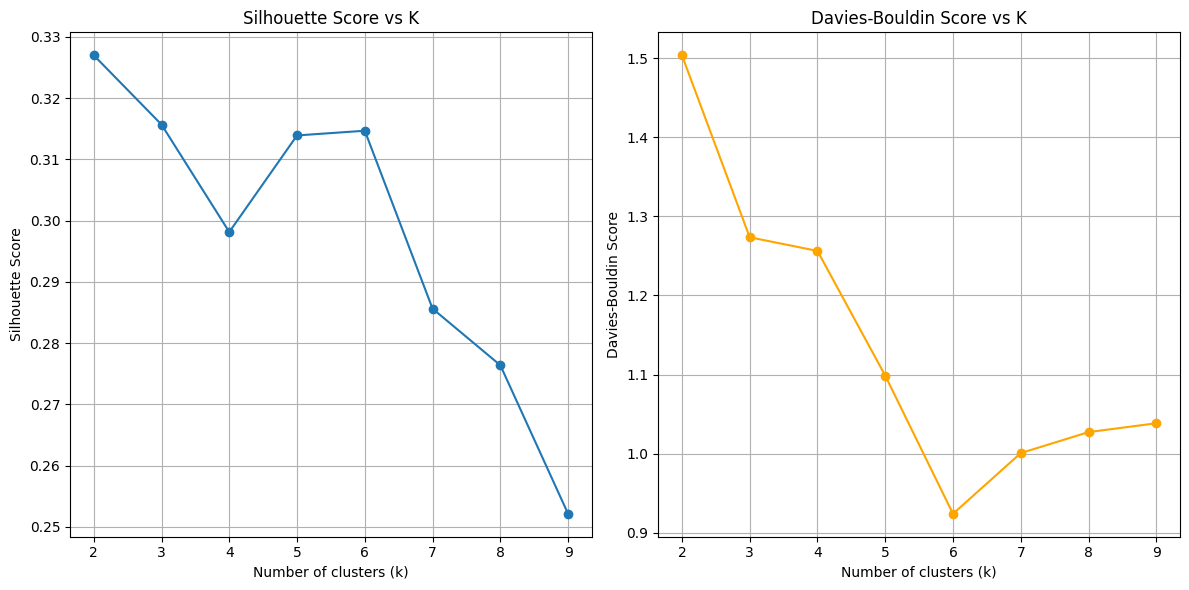

In [161]:
# Define the range of k (number of clusters) to test
k_values = range(2, 10) 

results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(df_pca)
    
    # Evaluate scores
    silhouette = silhouette_score(df_pca, labels)
    dbi = davies_bouldin_score(df_pca, labels)

    results.append({
        "k": k,
        "silhouette_score": silhouette,
        "davies_bouldin": dbi
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df["k"], results_df["silhouette_score"], marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df["k"], results_df["davies_bouldin"], marker='o', color='orange')
plt.title("Davies-Bouldin Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [163]:
k = 3 # Adjust this value based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_pca)

# Evaluate clustering quality
sil_score = silhouette_score(df_pca, clusters_kmeans)
print("Silhouette Score:", sil_score)

dbi = davies_bouldin_score(df_pca, clusters_kmeans)
print(f"Davies-Bouldin Score: {dbi:.3f}")

Silhouette Score: 0.31566464308819714
Davies-Bouldin Score: 1.274


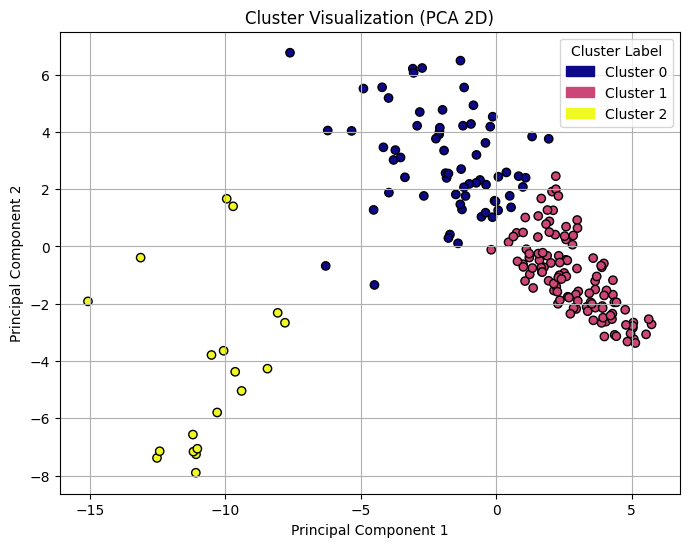

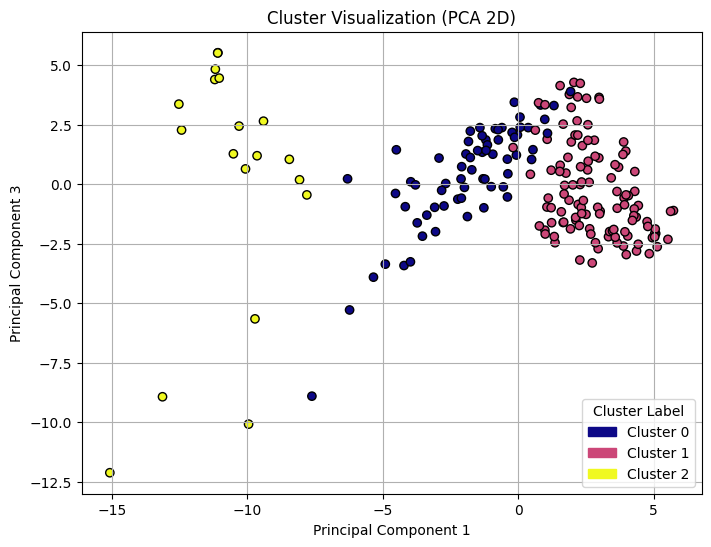

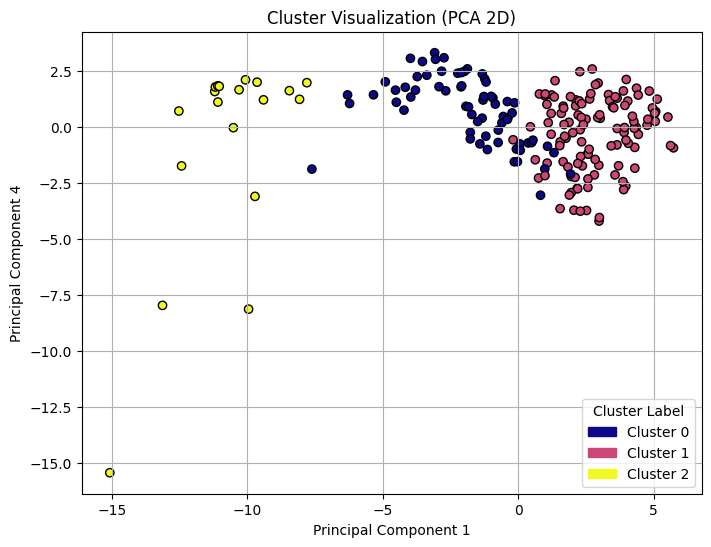

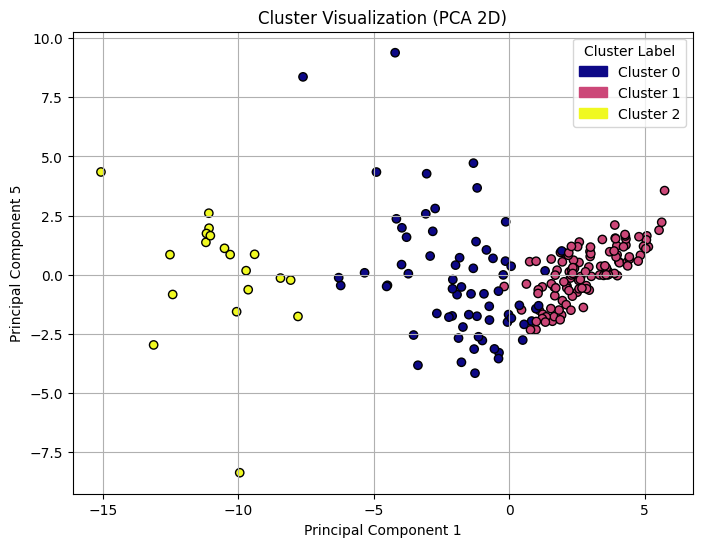

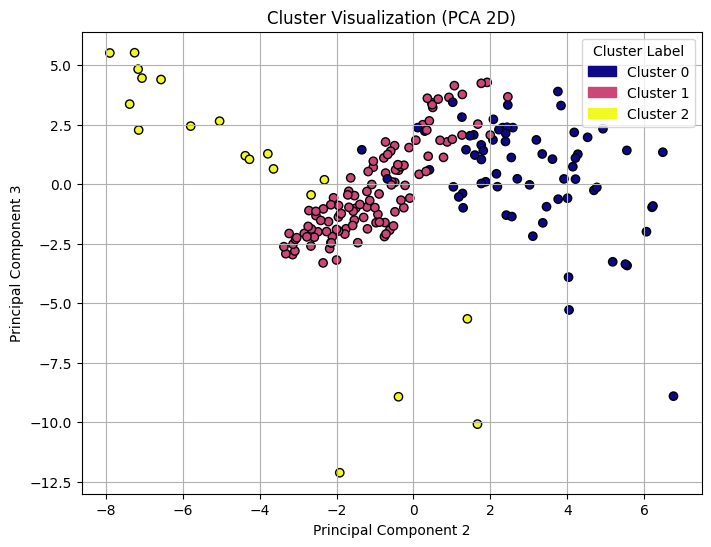

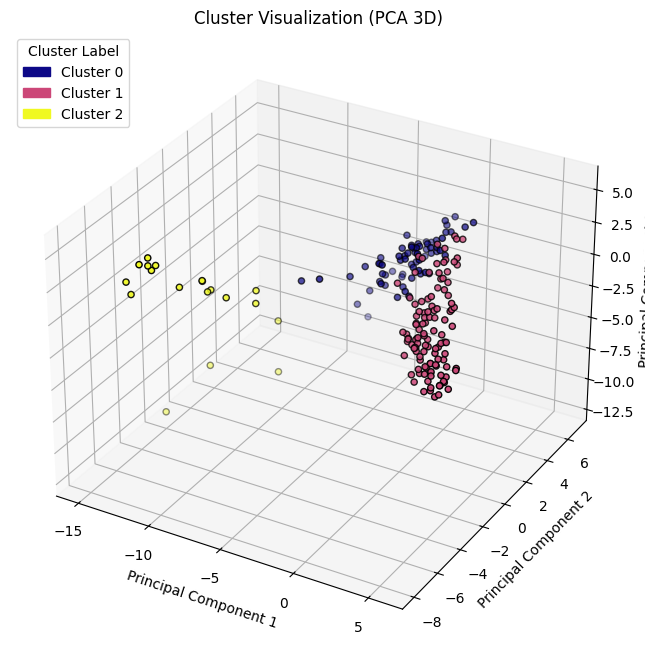

In [164]:
# Plot KMeans clusters from different PCA components

plot_clusters(df_pca, clusters_kmeans)
plot_clusters(df_pca, clusters_kmeans, 0, 2)
plot_clusters(df_pca, clusters_kmeans, 0, 3)
plot_clusters(df_pca, clusters_kmeans, 0 ,4)
plot_clusters(df_pca, clusters_kmeans, 1 ,2)
plot_clusters(df_pca, clusters_kmeans, 0, 1, 2)

### DBSCAN

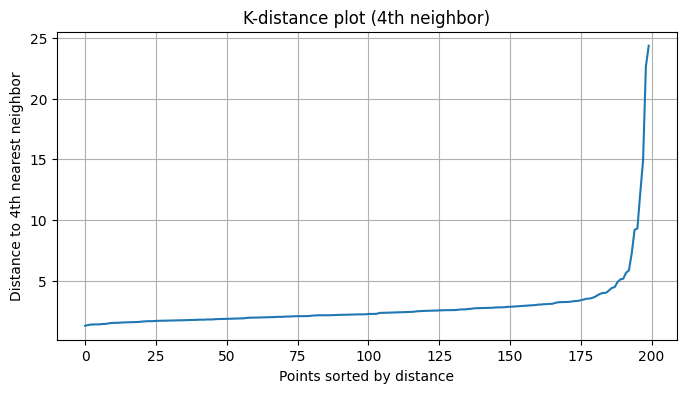

In [165]:
# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Sort distances to find the "knee" point
distances = np.sort(distances[:, 4])  # 4th nearest neighbor distance
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance plot (4th neighbor)")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th nearest neighbor")
plt.grid(True)
plt.show()


In [166]:
# Define the eps range and min_samples
eps_values = np.arange(0.5, 10.0, 0.1)  # Adjust based on your k-distance plot
min_samples = 5

results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(df_pca)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Mask for non-noise points
    mask = labels != -1
    
    # Only evaluate if we have at least 2 clusters and some valid points
    if n_clusters >= 2 and np.sum(mask) > 10:
        silhouette = silhouette_score(df_pca[mask], labels[mask])
        dbi = davies_bouldin_score(df_pca[mask], labels[mask])
    else:
        silhouette = np.nan
        dbi = np.nan
    
    results.append({
        "eps": eps,
        "clusters": n_clusters,
        "noise_points": n_noise,
        "silhouette_score": silhouette,
        "davies_bouldin": dbi
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

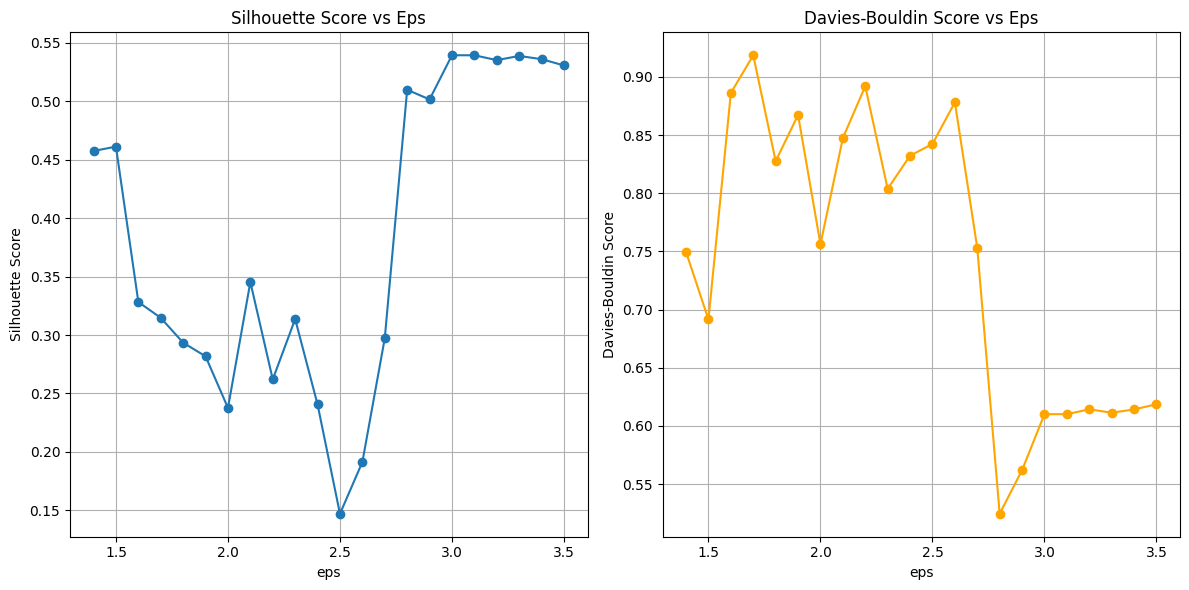

In [167]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df["eps"], results_df["silhouette_score"], marker='o')
plt.title("Silhouette Score vs Eps")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df["eps"], results_df["davies_bouldin"], marker='o', color='orange')
plt.title("Davies-Bouldin Score vs Eps")
plt.xlabel("eps")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [170]:
eps = 3.0

dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan.fit(df_pca)

# Add cluster labels to original dataframe
labels = dbscan.labels_  # -1 means noise


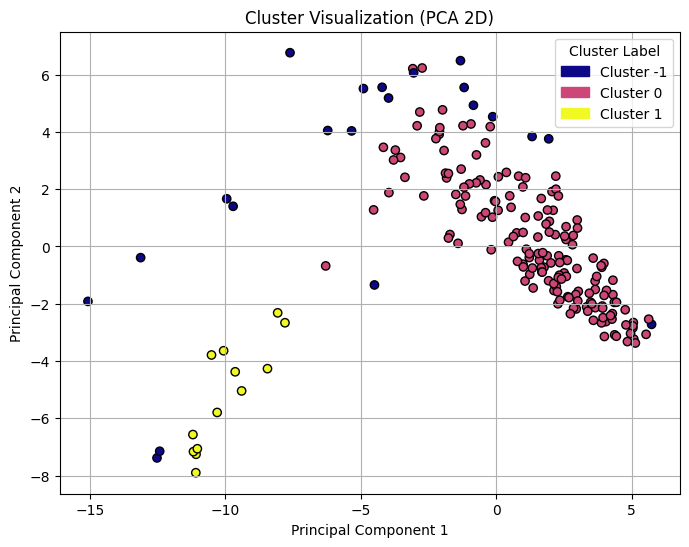

In [171]:
# Plot DBSCAN clusters from different PCA components
plot_clusters(df_pca, labels)

## Add Labels to Output Df

In [172]:
transformed_output_df.head()

,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,...,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200,Pollution_delta_300,Pollution_delta_400,Pollution_delta_500
0,1.0,0.000115,1.0,0.000076,48.179088,-0.999885,-0.005427,-0.031775,-0.000132,-2.651926e-07,...,0.003122,0.031540,0.007642,0.000122,0.000002,3.706737e-07,3.462754e-07,3.498209e-07,3.541944e-07,3.590733e-07
1,2.0,0.060300,1.0,0.036358,81.992573,-0.939700,-0.002453,-0.010504,-0.030004,-1.484937e-04,...,0.002773,0.013042,0.022083,0.000769,0.000030,1.182031e-05,1.174997e-05,1.332386e-05,1.512903e-05,1.718550e-05
2,3.0,0.024293,1.0,0.016392,70.797343,-0.975707,-0.002246,-0.009987,-0.032972,-7.269284e-05,...,0.001470,0.006713,0.034759,0.002263,0.000071,2.963102e-06,9.077939e-07,9.258606e-07,1.017642e-06,1.119245e-06
3,4.0,0.008210,1.0,0.006351,46.300617,-0.991790,-0.006926,-0.051631,-0.000063,3.191635e-06,...,0.005180,0.038447,0.001978,0.000045,0.000002,6.419088e-07,6.296242e-07,6.644029e-07,7.019232e-07,7.418679e-07
4,5.0,0.021762,1.0,0.021762,67.916853,-0.978238,-0.003732,-0.013456,-0.018752,-9.801631e-05,...,0.003092,0.023825,0.005857,0.000073,0.000030,2.946721e-05,2.916648e-05,2.800400e-05,2.689154e-05,2.582684e-05


In [173]:
# Add cluster labels to the transformed DataFrame
transformed_output_df["kmeans_cluster_id"] = clusters_kmeans
transformed_output_df["dbscan_cluster_id"] = labels
# Save the transformed DataFrame with cluster labels
transformed_output_df.to_csv(os.path.join(porcessed_data_dir, f'transformed_output_with_{k}_clusters.csv'), index=False)

# Create a new df to map run_id to cluster_id
cluster_mapping_df = transformed_output_df[["run_id", "kmeans_cluster_id", "dbscan_cluster_id"]]

cluster_mapping_df

,run_id,kmeans_cluster_id,dbscan_cluster_id
0,1.0,1,0
1,2.0,1,0
2,3.0,1,0
3,4.0,1,0
4,5.0,1,0
...,...,...,...
195,196.0,0,0
196,197.0,0,-1
197,198.0,0,-1
198,199.0,1,0


In [174]:
# Check for duplicates in the mapping DataFrame
print('duplicates: ', cluster_mapping_df.duplicated().sum())
# Check for null values in the mapping DataFrame
print('null values: \n', cluster_mapping_df.isnull().sum())

duplicates:  0
null values: 
 run_id               0
kmeans_cluster_id    0
dbscan_cluster_id    0
dtype: int64


In [175]:
output_df.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id
0,1.000000,0.100000,0.010000,0.001000,0.0,1.0
1,0.999745,0.100337,0.010041,0.001177,0.2,1.0
2,0.999487,0.100677,0.010082,0.001354,0.4,1.0
3,0.999225,0.101019,0.010124,0.001532,0.6,1.0
4,0.998961,0.101363,0.010165,0.001710,0.8,1.0


In [176]:
# Merge the cluster mapping DataFrame with the original output DataFrame
output_df_with_labels = output_df.merge(cluster_mapping_df, on="run_id", how="left")
output_df_with_labels.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,kmeans_cluster_id,dbscan_cluster_id
0,1.000000,0.100000,0.010000,0.001000,0.0,1.0,1,0
1,0.999745,0.100337,0.010041,0.001177,0.2,1.0,1,0
2,0.999487,0.100677,0.010082,0.001354,0.4,1.0,1,0
3,0.999225,0.101019,0.010124,0.001532,0.6,1.0,1,0
4,0.998961,0.101363,0.010165,0.001710,0.8,1.0,1,0


In [177]:
output_df_with_labels.tail()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,kmeans_cluster_id,dbscan_cluster_id
500195,0.021380,0.099817,5.000838e-48,1.054658,499.2,200.0,1,0
500196,0.021382,0.099816,4.748379e-48,1.054661,499.4,200.0,1,0
500197,0.021383,0.099816,4.508664e-48,1.054664,499.6,200.0,1,0
500198,0.021385,0.099816,4.281050e-48,1.054667,499.8,200.0,1,0
500199,0.021386,0.099816,4.064926e-48,1.054670,500.0,200.0,1,0


In [178]:
# Sanity check that each run id is only in one cluster
output_df_with_labels.groupby("run_id")["kmeans_cluster_id"].nunique().value_counts()

kmeans_cluster_id
1    200
Name: count, dtype: int64

In [179]:

# File name for the processed data
processed_data_file = os.path.join(porcessed_data_dir, f'bardis_ensemble_python_ver_{rows_n}_{time_periods}_k{k}_eps{eps}.csv')
# Save the output DataFrame with cluster labels
output_df_with_labels.to_csv(processed_data_file, index=False)

print(f"Processed data saved to {processed_data_file}")


Processed data saved to /home/tony-ubuntu/decision_sciences/looking_back_to_look_forward/results_analysis/processed_data/bardis_ensemble_python_ver_200_500_k3_eps3.0.csv
